<a href="https://colab.research.google.com/github/captmmari/Moringa-wk3/blob/main/SIMON_MMARI_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries.**

#**Defining the question**

**Specifying the question**
I will be studying the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I will be able to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

#**Understanding the context**

In this project, I will be ab;e to identify the factors that affect house pricing and also be able to predict pricing of different houses

#**Recording the experimental design**

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

5 Multiple regression

5 Quantile regression

6 Ridge regression

7 Lasso Regression

8 Elastic net regression.

9 Predictions of pricings

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Loading the dataset.**

In [ ]:
#@title Default title text
# Loading Dataset provided.
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Checking top dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Checking bottom dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# **Cleaning the dataset.**

In [ ]:
# Checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Checking for duplicated values
df.duplicated().sum()

3

In [ ]:
# Dropping duplicated values
df1 = df.drop_duplicates()
print(df1)

               id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]


In [ ]:
# Checking if duplicates have been dropped
df1.duplicated().sum()

0

In [ ]:
# Checking Dataset columns
df1.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# checking datatyoes
df1.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Checking Dataset shape
df1.shape

(21610, 20)

In [ ]:
# Dropping some coluumns

df2 = df1.drop(['yr_built', 'grade', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_living15', 'sqft_basement', 'sqft_lot15'], axis = 1)

In [ ]:
# Checking New dataset shape
df2.shape

(21610, 11)

In [ ]:
# Cheking remainig columns
df2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'zipcode', 'lat', 'long'],
      dtype='object')

# **Univariate Analysis.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

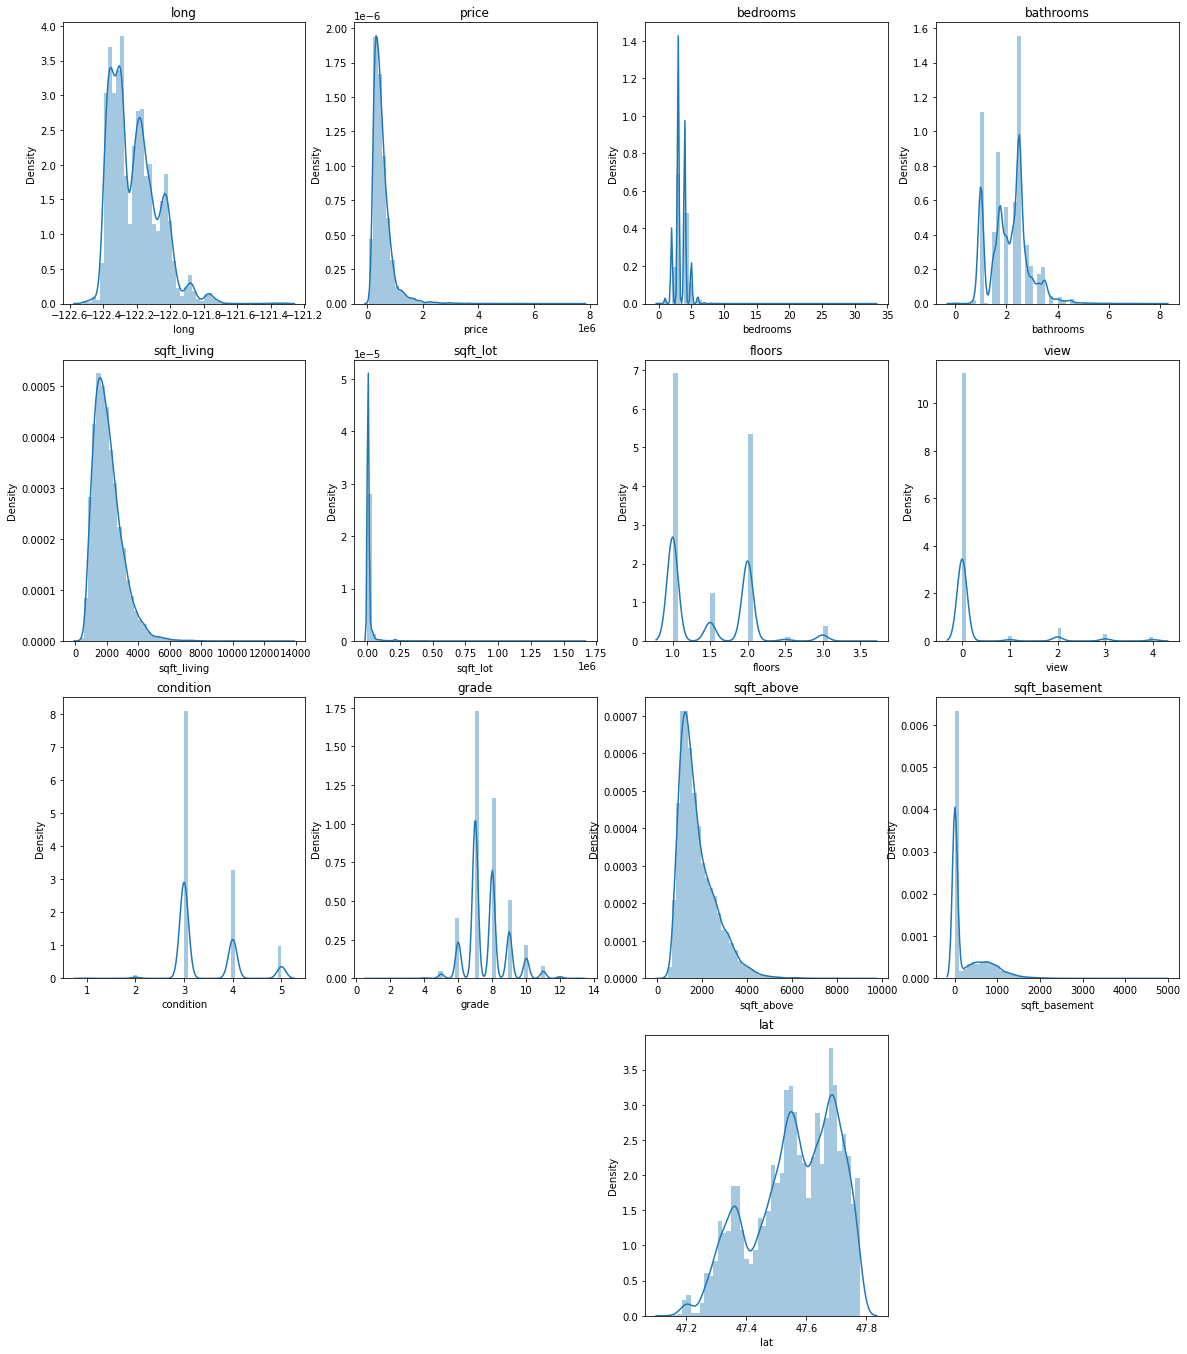

In [ ]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [ ]:
# describing the data
df2.describe()

# displays the statistical features of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,1788.347894,98077.945673,47.560049,-122.213910
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,828.138723,53.505373,0.138572,0.140833
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,1190.000000,98033.000000,47.470925,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,2210.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,98199.000000,47.777600,-121.315000


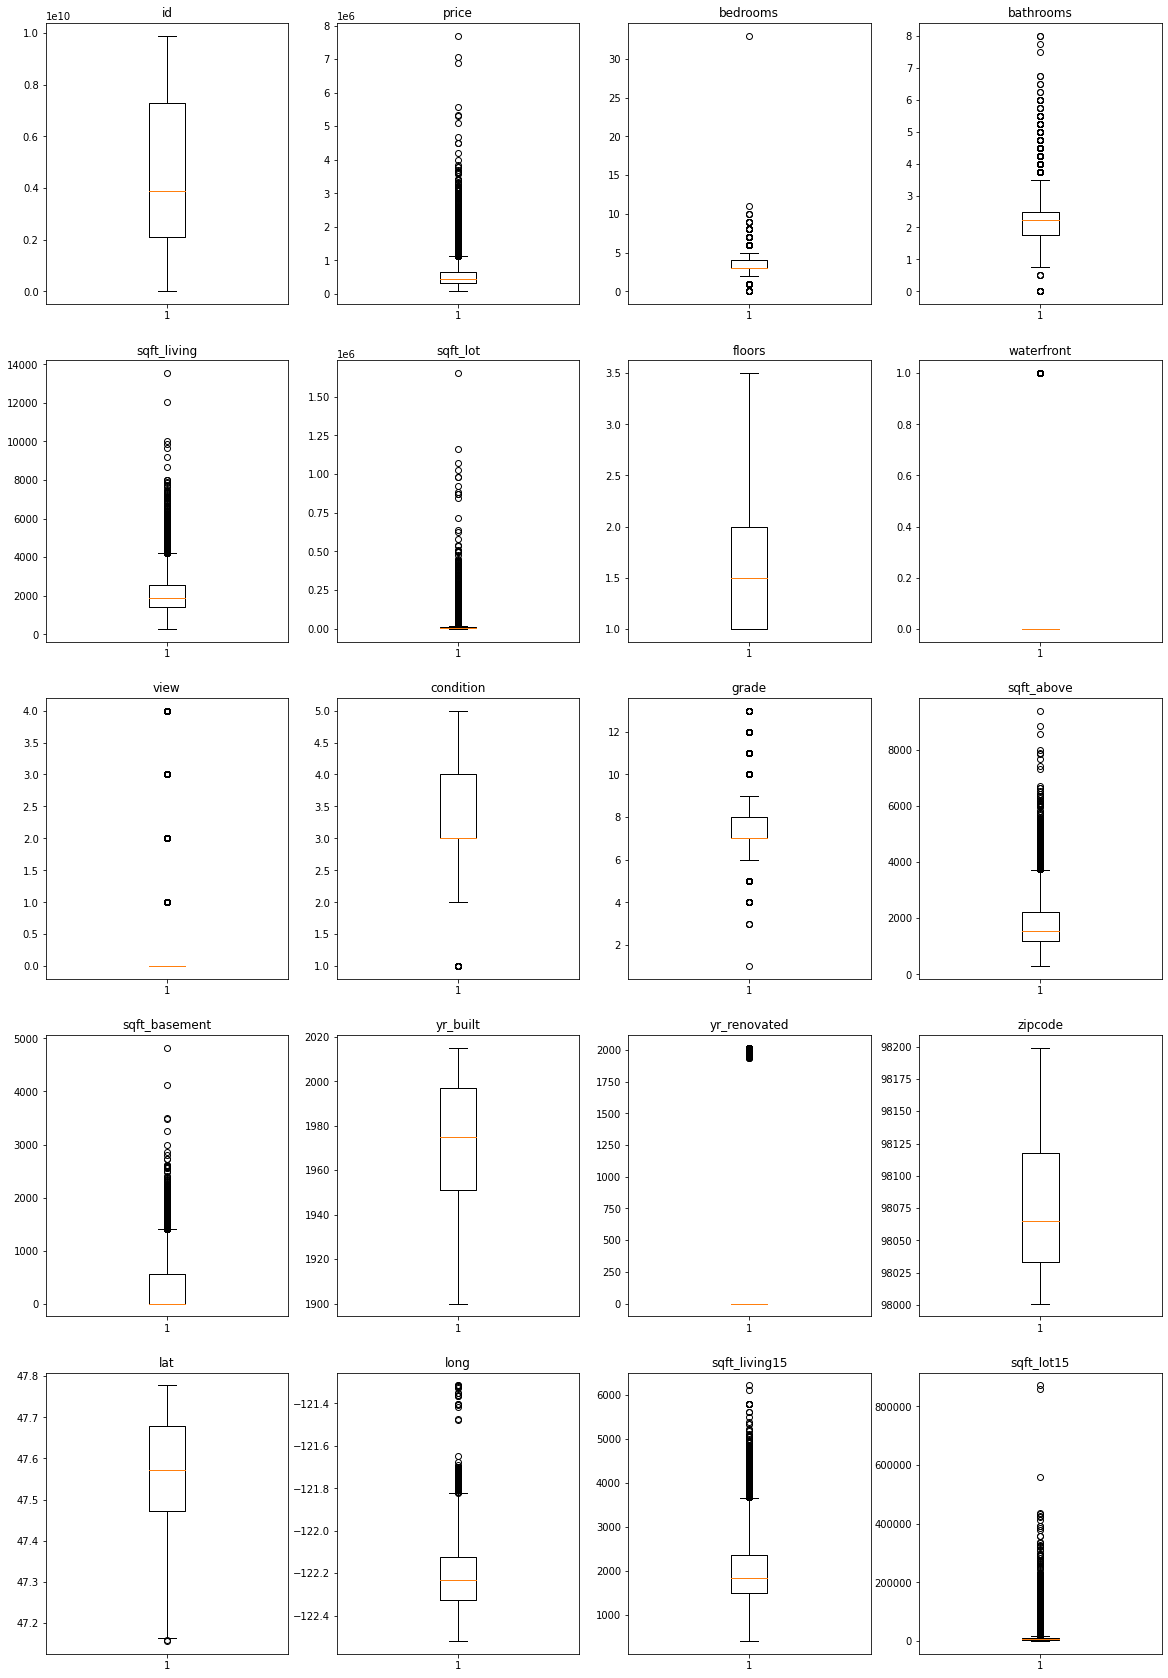

In [ ]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df3.shape)

# Printing the shape of our old dataset
print(df2.shape)

(17445, 11)
(21610, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
# replacing values in waterfront with a yes and no
df3 = df2.replace({'waterfront': {0 :'no', 1 :'yes'}})

In [ ]:
# converting zipcode to string datatype
df3['zipcode'] = df3['zipcode'].astype(str)

In [ ]:
# converting variables from float to int 
df3['bathrooms'] = df3['bathrooms'].astype(int)
df3['floors'] = df3['floors'].astype(int)

# **BIvariate analysis.**


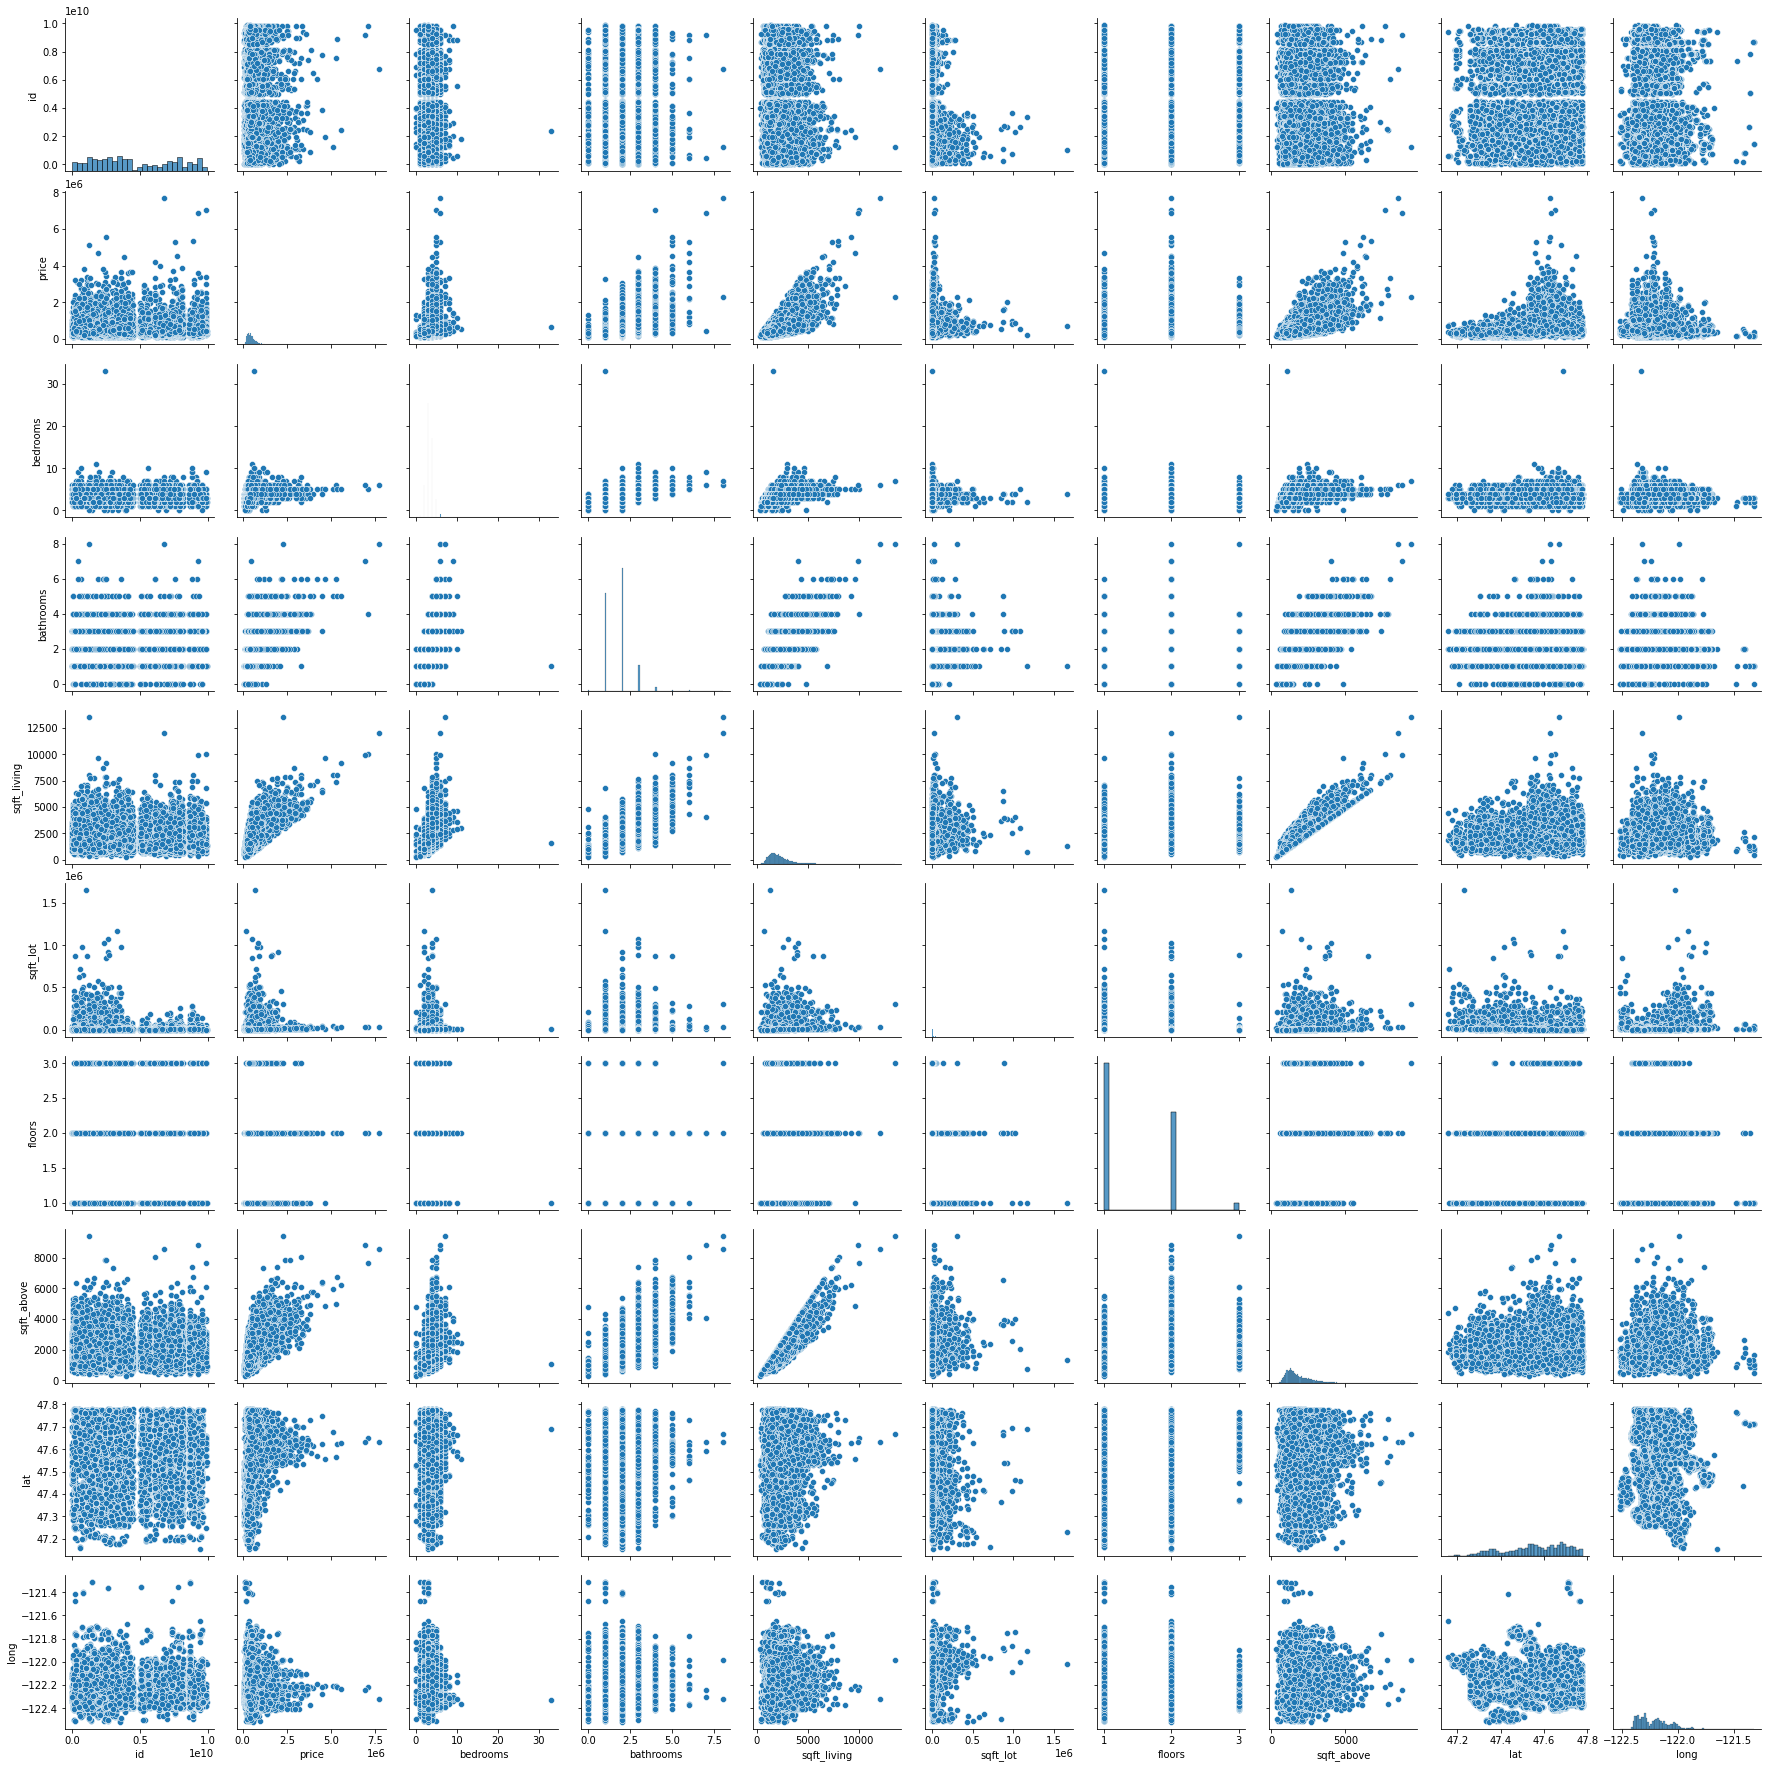

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df3)
plt.show()

In [ ]:
# tabulating the correlation coefficients
corr = df3.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
id,1.000000,-0.016803,0.001354,-0.000115,-0.012239,-0.132101,0.019073,-0.010857,-0.001861,0.020776
price,-0.016803,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.605569,0.306922,0.021567
bedrooms,0.001354,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,0.477619,-0.008953,0.129474
bathrooms,-0.000115,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.639963,0.031385,0.179387
sqft_living,-0.012239,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.876600,0.052521,0.240221
sqft_lot,-0.132101,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.183527,-0.085680,0.229552
floors,0.019073,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.517903,0.029543,0.158923
sqft_above,-0.010857,0.605569,0.477619,0.639963,0.876600,0.183527,0.517903,1.000000,-0.000823,0.343791
lat,-0.001861,0.306922,-0.008953,0.031385,0.052521,-0.085680,0.029543,-0.000823,1.000000,-0.135545
long,0.020776,0.021567,0.129474,0.179387,0.240221,0.229552,0.158923,0.343791,-0.135545,1.000000


#**Regression Analysis.**

In [ ]:
# using the correlation coefficients o compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
id,1.020962,0.006513,0.002504,0.000882,-0.026828,0.146350,-0.018281,0.030658,0.006861,-0.055689
price,0.006513,2.468437,0.343983,-0.210321,-1.640679,-0.005125,0.152228,-0.274967,-0.623413,0.320961
bedrooms,0.002504,0.343983,1.601751,-0.288752,-1.101022,0.116595,0.163501,0.061859,-0.015703,0.025288
bathrooms,0.000882,-0.210321,-0.288752,2.318099,-1.369384,0.009009,-0.735824,0.378838,0.077198,-0.049884
sqft_living,-0.026828,-1.640679,-1.101022,-1.369384,7.541888,-0.149321,0.994017,-4.750195,0.113038,0.137121
sqft_lot,0.146350,-0.005125,0.116595,0.009009,-0.149321,1.120464,0.137434,-0.131228,0.074136,-0.207654
floors,-0.018281,0.152228,0.163501,-0.735824,0.994017,0.137434,1.720230,-1.511014,-0.105287,0.069410
sqft_above,0.030658,-0.274967,0.061859,0.378838,-4.750195,-0.131228,-1.511014,6.115376,0.262608,-0.726132
lat,0.006861,-0.623413,-0.015703,0.077198,0.113038,0.074136,-0.105287,0.262608,1.198800,0.046257
long,-0.055689,0.320961,0.025288,-0.049884,0.137121,-0.207654,0.069410,-0.726132,0.046257,1.259514


In [ ]:
##
X = df2.values
y = df2['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual 

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-3.0869790553281234e-11

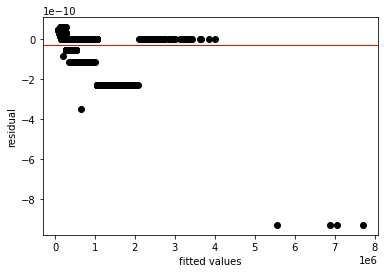

In [ ]:
# residual plot
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


#**Multiple Linear regression.**

In [ ]:
#separating independent and dependent variable

X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values

In [ ]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

0.011625937577326523


In [ ]:
# regression coefficient
regressor.intercept_

-1.3804756160351985

In [ ]:
# regression coeefficient
regressor.coef_

array([-9.10361539e-08, -8.14666509e-03,  1.26749259e-02, -1.14432157e-05,
        4.21098858e-07, -1.65236732e-02,  7.05107862e-05, -1.27226266e-03,
        8.22724629e-02])

In [ ]:
for i in range(4):
    print(regressor.coef_[i])

-9.103615392879642e-08
-0.0081466650915758
0.012674925920314422
-1.1443215685520529e-05


In [ ]:
# comparing the predicted and actual data
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,4322.000000,4322.000000
mean,-122.213179,-122.215454
std,0.144247,0.089637
min,-122.509000,-122.434381
25%,-122.330000,-122.294085
50%,-122.234500,-122.196969
75%,-122.121250,-122.146066
max,-121.315000,-121.661560


In [ ]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07937532129921519
Mean Squared Error: 0.012043281368292998
Root Mean Squared Error: 0.10974188520475214


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

0.10967549757542394

In [ ]:
# finding the random states
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)<1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

6.638762932820175e-05
RandomState: 0
4.516231507833979e-05
RandomState: 1
0.00040846016149148623
RandomState: 2
9.384767185940945e-06
RandomState: 3
9.985692112167432e-05
RandomState: 4
2.817315803070597e-05
RandomState: 5
0.000374038507641658
RandomState: 6
0.0002081610513654103
RandomState: 7
0.0004587626211029622
RandomState: 8
0.0003765198911871298
RandomState: 9
3.0204952461254653e-05
RandomState: 10
0.00017307715959652414
RandomState: 11
0.0003280280255568424
RandomState: 12
3.473681871314638e-05
RandomState: 13
7.800841526695024e-05
RandomState: 14
0.00018437774621284098
RandomState: 15
0.00013658904869844057
RandomState: 16
6.727744811795e-05
RandomState: 17
6.211013285115086e-05
RandomState: 18
4.789020696051305e-05
RandomState: 19
5.3034528378723134e-05
RandomState: 20
0.00027744924086069156
RandomState: 21
0.00012323077680077843
RandomState: 22
1.721495912355986e-05
RandomState: 23
6.232459385696609e-05
RandomState: 24
0.00011242126151997378
RandomState: 25
0.000331859545985

#**Quantile Regression**

In [260]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# recalling the base model
print(first_model)

0.01514699676462835


In [261]:
# I will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Mon, 14 Feb 2022   No. Observations:                21610
Time:                        21:22:03   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
bedrooms      8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04


#**Ridge egression**

In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [263]:
# We now use the .fit function to run the model and then use the .best_params_ and

# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

0.015172036722876259

In [264]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.015146569859145783


#**Lasso Regression**

In [265]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [266]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(X, y) 

# Print scores 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.1888293177990802
lasso MSE: 0.015575525791365003
lasso coef: [ 1.88609532e-07 -0.00000000e+00 -0.00000000e+00 -2.20939403e-05
 -2.33430807e-07  0.00000000e+00 -2.19566272e-05  2.23370653e-04]


In [267]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.21018031416030836
linear score: 0.21210086274968654
lasso MSE: 0.015044304070278229
linear MSE: 0.01500772190161573
lasso best estimator coef: [ 1.85596706e-07  0.00000000e+00 -0.00000000e+00 -2.39151137e-05
 -1.99929386e-07  0.00000000e+00 -1.55480280e-05  5.45509409e-04]
linear coef: [ 1.85623229e-07  2.48404089e-03 -7.98557879e-03 -1.57858714e-05
 -1.76044934e-07  2.07288232e-02 -2.68506624e-05  5.60864100e-04]


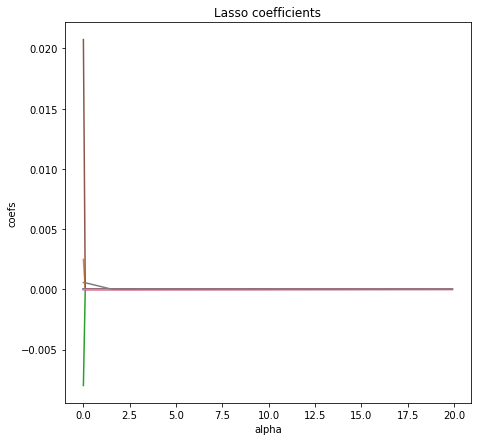

In [268]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values 
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

#**Elastic Net Regression.**

In [269]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Creating our linear regression model for the purpose of comparison
print(first_model) 

0.01514699676462835


In [270]:
# Elastic Net Model


elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [271]:
# I will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.015227142216240528

In [272]:
from sklearn.linear_model import ElasticNet
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

0.01529778379394367


In [273]:
print(regr.intercept_)

7.196749863873947


In [274]:
print(regr.predict([[0,1,2,3,4,5,6,7]]))

[7.19945006]


 the models and computations above, it was realised that the mean squared errors for th models were:

Mean Squared Error: 0.01514699676462835 for multiple linear regression

Pseudo R-squared: for quantile regression 0.015575525791365003 for quantile regression

MSE for ridge regression: 0.015146569859145783

lasso MSE: 0.015044304070278229

Elastic net MSE: 0.01529778379394367